<a href="https://colab.research.google.com/github/sepse/Kosovo-Import-Data/blob/main/exim_dogana_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kosovo Import Data - 2022

This research analyzes a dataset containing customs import data from Kosovo's Customs Open Data, which can provide valuable insights and inform decision-making in various areas such as international trade, economics, and business.

Firstly, analyzing the goods imported can provide insights into a country's consumption patterns and demand for certain products. This information can be useful for businesses looking to expand their operations or introduce new products in a particular market.

After downloading the dataset, we start by loading the python libraries that will enable us to perform data science operations on it.

In [38]:
!pip install plotly_express
#!pip install pycountry
!pip install iso3166

import iso3166

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
#import pycountry


data = '/content/drive/MyDrive/Colab Notebooks/Dogana/Open_DATA_Import-Janar-Dhjetor-2022.xlsx'
exim = pd.read_excel(data, index_col=0)
exim.info()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
<class 'pandas.core.frame.DataFrame'>
Int64Index: 223226 entries, 2022 to 2022
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MUAJI           223226 non-null  int64  
 1   Regjimi         223226 non-null  object 
 2   Origjina        223226 non-null  object 
 3   Kodi Tarifor    223226 non-null  object 
 4   Sasia           69304 non-null   float64
 5   Vlera Mallrave  223226 non-null  float64
 6   Netweight       223226 non-null  float64
 7   Taksa Doganës   223226 non-null  float64
 8   Taksa Akcizës   223226 non-null  float64
 9   Taksa TVSH-së   223226 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 18.7+ MB


In [39]:
def convert_to_iso3(country):
    try:
        two_letter_code = country[:2].upper()
        iso3_country = iso3166.countries_by_alpha2[two_letter_code].alpha3
        return iso3_country
    except KeyError:
        return None

exim['country'] = exim['Origjina'].apply(convert_to_iso3)

We see from the dataset profile that we have 10 Columns of import data, describing Month, Regime, Origin, Tariff Code, Amount, Value, Weight, Customs Tax, Excise Tax and VAT. We continue to pull a random sample from the dataset so we can get an idea of what do entries look like and if any potential format adjusting is necessary.

In [40]:
exim.sample(10)

,MUAJI,Regjimi,Origjina,Kodi Tarifor,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së,country
VITI,,,,,,,,,,,
2022,10,IM4,RO - RUMANIA,4415209000 - Paleta te tjera prej druri,NaN,14028.93000,62509.000,48.37,0.0,2533.93,ROU
2022,3,IM4,IN - INDIA,0307520000 - Te ngrira,NaN,1400.00000,200.000,140.00,0.0,277.20,IND
2022,11,IM4,IN - INDIA,5804290090 - Te tjera,NaN,448.32305,20.700,44.83,0.0,88.76,IND
2022,6,IM4,BG - BULLGARIA,7412200000 - Përshtatjet e tubave dhe tubacion...,NaN,54.00000,2.130,5.40,0.0,10.69,BGR
2022,5,IM4,GB - MBRETËRIA E BASHKUAR,"1806329000 - Cokollata ne blloqe, pllaka ose s...",NaN,1470.92000,75.600,147.09,0.0,291.24,GBR
2022,12,IM4,GB - MBRETËRIA E BASHKUAR,4016995700 - Të tjera,NaN,177.95000,5.540,4.51,0.0,32.84,GBR
2022,1,IM4,CN - KINA,8532220000 - Elektrolitik alumini,NaN,681.60000,9.850,68.16,0.0,134.96,CHN
2022,11,IM4,AT - AUSTRIA,3303001000 - Parfumet,NaN,3111.84000,78.333,0.00,0.0,560.15,AUT
2022,1,IM4,DE - GJERMANIA,"1905905500 - Produkte te tjera te furtarise, t...",NaN,1832.55000,296.085,82.85,0.0,344.78,DEU


We can see that quite some data from 'Amount' column are missing (Not-a-Number), though Weight data is complete and the general formatting seems allright for data processing. We continue to get an initial statistical snapshot of the each numerical column, describing averages, min/max values per column, by calling the 'Describe' function.

In [41]:
exim.describe()

,MUAJI,Sasia,Vlera Mallrave,Netweight,Taksa Doganës,Taksa Akcizës,Taksa TVSH-së
count,223226.000000,6.930400e+04,2.232260e+05,2.232260e+05,223226.000000,2.232260e+05,2.232260e+05
mean,6.608545,2.474017e+04,2.510195e+04,2.110725e+04,596.112377,2.287508e+03,3.924662e+03
std,3.427528,5.100786e+05,2.924163e+05,3.569500e+05,6221.366761,1.001749e+05,5.955740e+04
min,1.000000,1.000000e-02,0.000000e+00,5.000000e-03,0.000000,0.000000e+00,0.000000e+00
25%,4.000000,5.000000e+00,2.141525e+02,9.480000e+00,0.000000,0.000000e+00,2.534000e+01
50%,7.000000,4.000000e+01,1.359170e+03,1.200000e+02,5.520000,0.000000e+00,1.801800e+02
75%,10.000000,5.200000e+02,8.456298e+03,1.568350e+03,93.600000,0.000000e+00,1.158237e+03
max,12.000000,3.674039e+07,4.467828e+07,3.039658e+07,676932.820000,1.299888e+07,8.381575e+06


The numerical data seem fine, though there are 2 non numerical columns that describe 'Country of origin' and 'Tariff code'(type of goods), and it would be informative to get an idea on import values from select countries; we do that by grouping columns based on certain values, in this case 'Origin'.

In [42]:
exim.groupby('Origjina')['Vlera Mallrave'].sum()

Origjina
AD - ANDORA                        4.226100e+02
AE - EM.E BASHKUARA ARABE          2.044508e+06
AF - AFGANISTANI                   5.351000e+01
AG - ANTIGA-BARBUDA                4.584533e+04
AI - ANGUILA                       6.900000e+02
                                       ...     
XX - Prodhime Vendore              9.037289e+05
XY - Mallra të Denacionalizuara    6.930217e+04
ZA - AFRICA JUGORE                 1.401133e+06
ZM - ZAMBIA                        1.806020e+04
ZW - ZIMBABVEJA                    4.112079e+04
Name: Vlera Mallrave, Length: 190, dtype: float64

# Mapping Data
Tabular data sometimes are not intuitive for getting a general idea about a topic, in this case since we are dealing with countries and trade values, we ought to display it visually so we can potentially create more points of interest. By using the python library 'Plotly', we can reffer to country codes in our dataset and represent the sum of annual trade values so we can see what are the total imports per country, and represent them as a heatmap.

In [43]:

df=pd.DataFrame(exim.groupby('country')['Vlera Mallrave'].sum())

fig = px.choropleth(df,locations=df.index,color='Vlera Mallrave',scope='world',color_continuous_scale=px.colors.sequential.GnBu,
                    range_color=(0,900000000),title='Value of Goods Imported',height=700
    )
fig.show()

Now it already makes more sense visually, as the values get darker they represent increasing import values, and some countries immediately stand out. Turkey, China, Germany and Serbia seem to be the top 4 import countries. We can zoom into the map and by hovering over a country we can see total impot value. We continue to first understand the country codes from the dataset so we can create unique plots to delve deeper.

In [44]:
exim['country'].unique()

array(['FRA', 'CHN', 'ITA', 'DEU', 'KEN', 'ALB', 'SVN', 'NLD', 'GRC',
       'TUR', 'MKD', 'CZE', 'BRA', 'UKR', 'POL', 'ISR', 'TUN', 'CHL',
       'ZAF', 'HRV', 'IND', 'ROU', 'HUN', 'SRB', 'BIH', 'MNE', 'BEL',
       'USA', 'LBY', 'IDN', 'UGA', 'COL', 'ETH', 'AUT', 'GBR', 'ESP',
       'IRL', 'RUS', 'SAU', 'DNK', 'SVK', 'LKA', 'VNM', 'BOL', 'ARG',
       'AUS', 'BGR', 'LVA', 'TWN', 'FIN', 'SWE', 'MDA', 'THA', 'CHE',
       'MYS', 'KOR', 'JPN', 'PAK', 'BGD', 'IRN', 'PHL', 'EGY', 'CYP',
       'PRT', 'MCO', 'CAN', 'OMN', 'LUX', 'ARE', 'KHM', 'MAR', 'MDG',
       'GEO', 'MMR', 'SGP', 'HKG', 'MUS', 'MEX', 'NOR', 'LAO', 'HND',
       'ARM', 'CUB', 'GTM', 'CPV', 'PAN', 'LTU', 'BHR', 'GAB', 'ECU',
       'CRI', 'PER', 'MAC', 'JOR', 'DOM', 'BLR', 'EST', 'CMR', 'SLV',
       'SYR', 'TKM', 'MLI', 'KAZ', 'NZL', 'NIC', 'GUF', 'CAF', 'MLT',
       'GHA', None, 'QAT', 'SEN', 'JEY', 'CIV', 'KGZ', 'IRQ', 'TJK',
       'UZB', 'DZA', 'BLM', 'VEN', 'BFA', 'VIR', 'AZE', 'LIE', 'KNA',
       'PRY', 'NGA', 

Using the country codes above, we select 5 countries that interest us, namely Turkey (TUR), Germany (DEU), Serbia (SRB), China (CHN) and Italy (ITA); we will plot a barchart showing the total imports from each country and see how they rank.

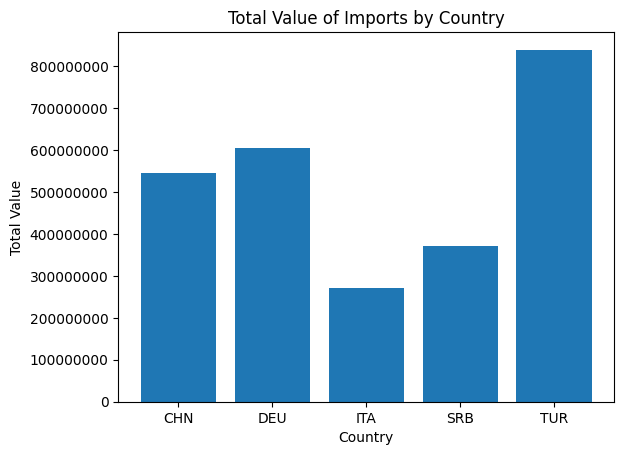

In [45]:
# Filter the dataframe for the desired countries
countries = ['TUR', 'DEU', 'SRB', 'CHN', 'ITA']
filtered_data = exim[exim['country'].isin(countries)]

# Group the data by country and calculate the total value
grouped_data = filtered_data.groupby('country')['Vlera Mallrave'].sum()

# Create the bar chart
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.title('Total Value of Imports by Country')

plt.ticklabel_format(style='plain', axis='y')  # Display tick labels without scientific notation

plt.show()


Turkey leads the chart with about 800 Million Euros in annual imports. Naturally we want to breakdown what could possibly make up all those imports, so we can first group columns by 'Tariff Code' and 'Value of Goods', and plot the 3 most valueable imports.

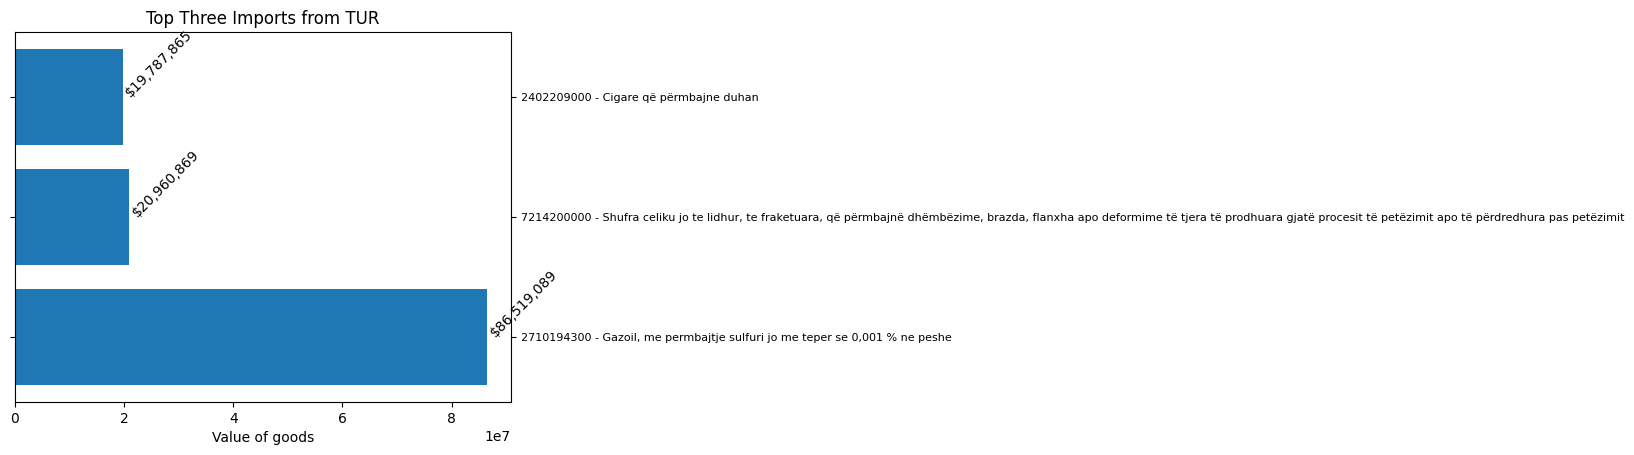

In [46]:

# Filter the dataframe for a specific country
country = 'TUR'  # Replace with the desired country
filtered_data = exim[exim['country'] == country]

# Group the data by 'Description of goods' and calculate the sum of 'Value of goods'
grouped_data = filtered_data.groupby('Kodi Tarifor')['Vlera Mallrave'].sum()

# Get the top three imports based on value
top_three = grouped_data.nlargest(3)

# Create the bar chart with horizontal bars and horizontal labels
plt.barh(top_three.index, top_three.values)
plt.xlabel('Value of goods')
plt.ylabel('')

# Add annotations to the bars
for i, value in enumerate(top_three.values):
    plt.text(value, i, f'${value:,.0f}', va='baseline', rotation=45)

# Shift the descriptions to the right
plt.tick_params(axis='y', labelleft=False, labelright=True, right=True)

plt.title(f'Top Three Imports from {country}')
plt.yticks(fontsize=8)

plt.show()

We seem to be importing a lot of Oil (fuel) from Turkey at 86.5 Million, followed by Steel and Cigarettes. What about other countries? Let's perform the same function on Serbia.

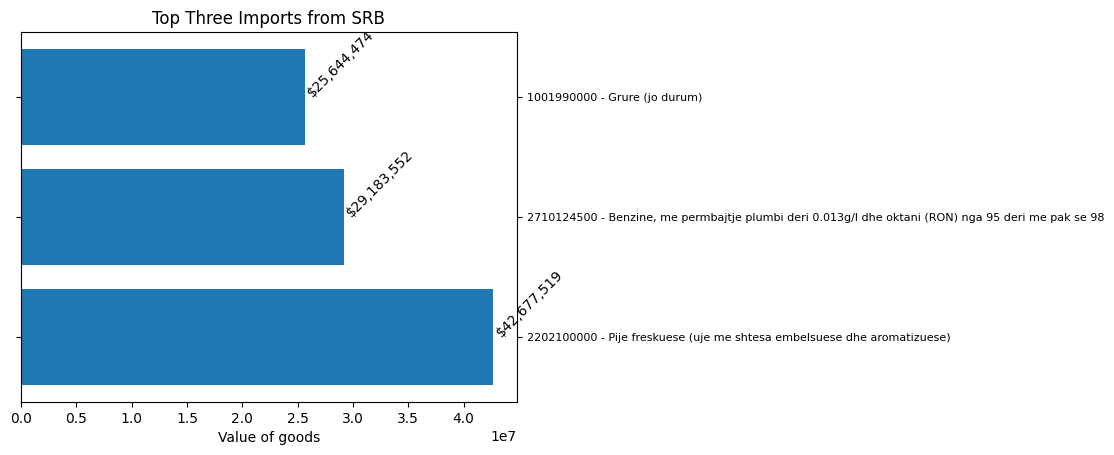

In [47]:
# Filter the dataframe for a specific country
country = 'SRB'  # Replace with the desired country
filtered_data = exim[exim['country'] == country]

# Group the data by 'Description of goods' and calculate the sum of 'Value of goods'
grouped_data = filtered_data.groupby('Kodi Tarifor')['Vlera Mallrave'].sum()

# Get the top three imports based on value
top_three = grouped_data.nlargest(3)

# Create the bar chart with horizontal bars and horizontal labels
plt.barh(top_three.index, top_three.values)
plt.xlabel('Value of goods')
plt.ylabel('')

# Add annotations to the bars
for i, value in enumerate(top_three.values):
    plt.text(value, i, f'${value:,.0f}', va='baseline', rotation=45)

# Shift the descriptions to the right
plt.tick_params(axis='y', labelleft=False, labelright=True, right=True)

plt.title(f'Top Three Imports from {country}')
plt.yticks(fontsize=8)

plt.show()

Imports from Serbia lead with Soft Drinks, Gasoline and Wheat.

# Understanding Seasonal Trends
Tabular data and barcharts are good at conveying some kinds of information, though why not add a time dimension so we can look if any seasonal patterns emerge by looking at the annual graph, specifically using Area Charts. We plot the charts using the 'Matplotlib' library, and see what the annua imports look from Italy.


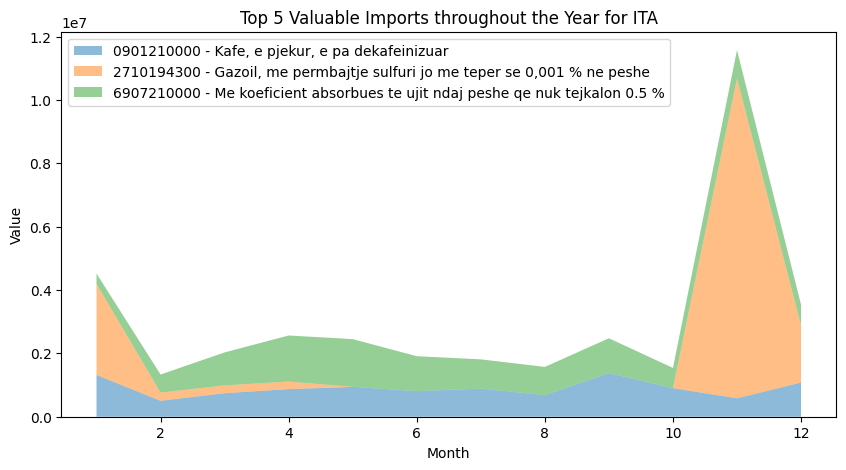

In [48]:

# Filter the dataframe for a specific country
country = 'ITA'  # Replace with the desired country
filtered_data = exim[exim['country'] == country]

# Group the data by 'goods' and 'month' and calculate the sum of 'value'
grouped_data = filtered_data.groupby(['Kodi Tarifor', 'MUAJI'])['Vlera Mallrave'].sum().reset_index()

# Get the top 5 imports based on value
top_five = grouped_data.groupby('Kodi Tarifor')['Vlera Mallrave'].sum().nlargest(3).index

# Filter the data for the top 5 imports
filtered_top_five = grouped_data[grouped_data['Kodi Tarifor'].isin(top_five)]

# Pivot the data to have months as columns and imports as rows
pivot_data = filtered_top_five.pivot(index='Kodi Tarifor', columns='MUAJI', values='Vlera Mallrave').fillna(0)

# Create the area chart
plt.figure(figsize=(10, 5))
plt.stackplot(range(1, 13), pivot_data.values, labels=pivot_data.index, alpha=0.5)

plt.xlabel('Month')
plt.ylabel('Value')
plt.title(f'Top 5 Valuable Imports throughout the Year for {country}')
plt.legend(loc='upper left')

plt.show()


Ceramics, Oil and Coffee seem to account for majority of imports from Italy. Individualy we could plot graphs for all goods and countries, but it would be informative to see the annual brekdown of 4 top import countries and see how they compare and contrast.


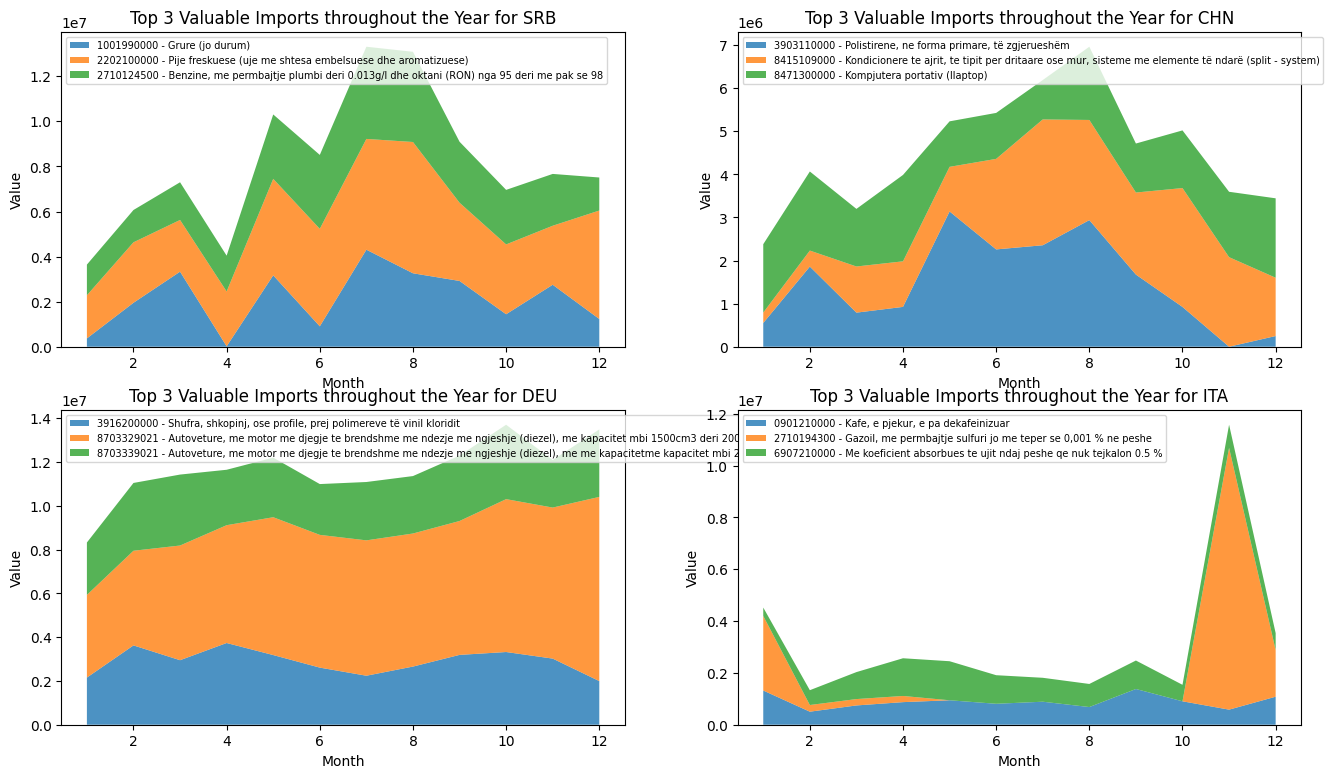

In [49]:
# Define the four countries
countries = ['SRB', 'CHN', 'DEU', 'ITA']  # Replace with the desired countries

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))

# Iterate over the countries and plot the area chart for each
for i, country in enumerate(countries):
    # Filter the dataframe for the specific country
    filtered_data = exim[exim['country'] == country]
    
    # Group the data by 'goods' and 'month' and calculate the sum of 'value'
    grouped_data = filtered_data.groupby(['Kodi Tarifor', 'MUAJI'])['Vlera Mallrave'].sum().reset_index()
    
    # Get the top 3 imports based on value
    top_three = grouped_data.groupby('Kodi Tarifor')['Vlera Mallrave'].sum().nlargest(3).index
    
    # Filter the data for the top 3 imports
    filtered_top_three = grouped_data[grouped_data['Kodi Tarifor'].isin(top_three)]
    
    # Pivot the data to have months as columns and imports as rows
    pivot_data = filtered_top_three.pivot(index='Kodi Tarifor', columns='MUAJI', values='Vlera Mallrave').fillna(0)
    
    # Create the area chart in the corresponding subplot
    ax = axes[i // 2, i % 2]
    ax.stackplot(range(1, 13), pivot_data.values, labels=pivot_data.index, alpha=0.8)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')
    ax.set_title(f'Top 3 Valuable Imports throughout the Year for {country}')
    ax.legend(loc='upper left', fontsize=7)

# Adjust the spacing between subplots
#plt.tight_layout()

# Show the plots
plt.show()


Though the type of goods imported are not surprising for the above-mentioned countries; Electronics from China, Cars from Germany, Food from Serbia, Ceramics from Italy. Though the amount of such imports do put things in perspective in our countries consumption profile.

# Monthly Totals
Lets plot a barchart showing total values of imports for each month, from all countries combined.

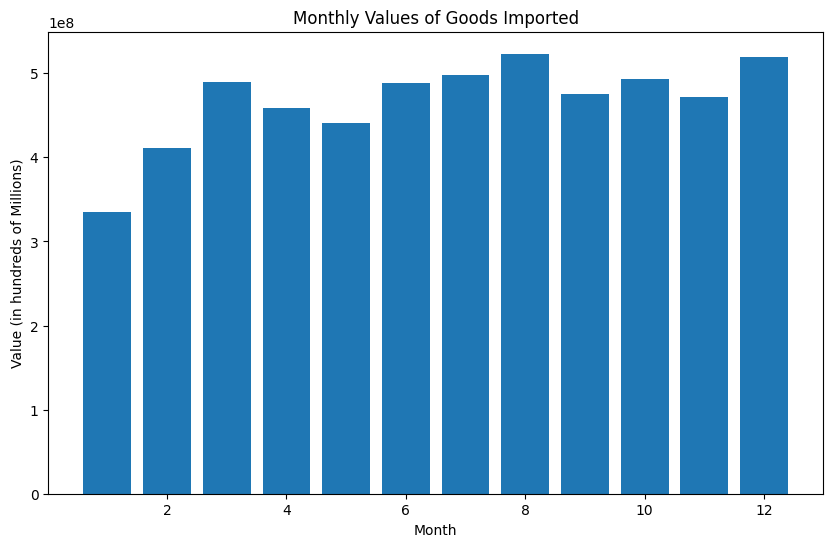

In [50]:
# Group the data by 'month' and 'goods' and calculate the sum of 'value'
grouped_data = exim.groupby(['MUAJI'])['Vlera Mallrave'].sum().reset_index()

months = range(1, 13)

# Create the bar chart for monthly values imported
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped_data['MUAJI'], grouped_data['Vlera Mallrave'])

# Customize the plot
ax.set_xlabel('Month')
ax.set_ylabel('Value (in hundreds of Millions)')
ax.set_title('Monthly Values of Goods Imported')

plt.show()

Overall the value of imported goods seems to range from 300 - 500 Million Euros per month. 

By analyzing customs import data can provide valuable information for policymakers, businesses, and other stakeholders, which can inform decision-making and improve the efficiency of trade and economic activities.
It can also help detect anomalies and potential fraudulent activities, such as underreporting or misclassification of imported goods, which can be used to improve customs enforcement and tax collection. 

